In [1]:
from sqlalchemy import *
from sqlalchemy.sql import *

import pandas
from matplotlib import pyplot as plt

engine = create_engine('sqlite:///Data/Chinook_Sqlite.sqlite')
metadata = MetaData()
metadata.reflect(bind=engine)
conn=engine.connect()

Album=Table("Album", metadata, autoload=True, autoload_with="engine")
MediaType=Table("MediaType", metadata, autoload=True, autoload_with="engine")
Artist=Table("Artist", metadata, autoload=True, autoload_with="engine")
Customer=Table("Customer", metadata, autoload=True, autoload_with="engine")
Employee=Table("Employee", metadata, autoload=True, autoload_with="engine")
Track=Table("Track", metadata, autoload=True, autoload_with="engine")
Genre=Table("Genre", metadata, autoload=True, autoload_with="engine")
Invoice=Table("Invoice", metadata, autoload=True, autoload_with="engine")
InvoiceLine=Table("InvoiceLine", metadata, autoload=True, autoload_with="engine")
Playlist=Table("Playlist", metadata, autoload=True, autoload_with="engine")
PlaylistTrack=Table("PlaylistTrack", metadata, autoload=True, autoload_with="engine")
A = Album.alias('A')
M = MediaType.alias('M')
Ar = Artist.alias('Ar')
C = Customer.alias('C')
E = Employee.alias('E')
T = Track.alias('T')
G = Genre.alias('G')
I = Invoice.alias('I')
IL = InvoiceLine.alias('IL')
P = Playlist.alias('P')
PT = PlaylistTrack.alias('PT')

print(metadata.tables.keys())

import pandas as pd
df=pd.read_csv('./Data/imdb.csv')

dict_keys(['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'Track', 'MediaType', 'Playlist', 'PlaylistTrack'])


#### №1. Методы работы со словарями. Итерация по элементам словаря. Методы keys(), values(), items(). Составьте словарь, содержащий в качестве ключей дни недели (Пн, Вт, Ср), а значениями температуру воздуха (20,18,17). Составьте цикл по элементам словаря и на каж ??? смирнов обкурился

**Словари в Python** - неупорядоченные коллекции произвольных объектов с доступом по ключу. Их иногда ещё называют ассоциативными массивами или хеш-таблицами.  

Создание словарей:

In [3]:
d = {'dict': 1, 'dictionary': 2}
print(d)
d = dict(short='dict', long='dictionary')
print(d)
d = dict([(1, 1), (2, 4)])
print(d)
d = dict.fromkeys(['a', 'b'], 20)
print(d)
d = {a: a ** 2 for a in range(7)}
print(d)

{'dict': 1, 'dictionary': 2}
{'short': 'dict', 'long': 'dictionary'}
{1: 1, 2: 4}
{'a': 20, 'b': 20}
{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36}


**Методы**  
dict.clear() - очищает словарь.

dict.copy() - возвращает копию словаря.

classmethod dict.fromkeys(seq[, value]) - создает словарь с ключами из seq и значением value (по умолчанию None).

dict.get(key[, default]) - возвращает значение ключа, но если его нет, не бросает исключение, а возвращает default (по умолчанию None).

dict.items() - возвращает пары (ключ, значение).

dict.keys() - возвращает ключи в словаре.

dict.pop(key[, default]) - удаляет ключ и возвращает значение. Если ключа нет, возвращает default (по умолчанию бросает исключение).

dict.popitem() - удаляет и возвращает пару (ключ, значение). Если словарь пуст, бросает исключение KeyError. Помните, что словари неупорядочены.

dict.setdefault(key[, default]) - возвращает значение ключа, но если его нет, не бросает исключение, а создает ключ со значением default (по умолчанию None).

dict.update([other]) - обновляет словарь, добавляя пары (ключ, значение) из other. Существующие ключи перезаписываются. Возвращает None (не новый словарь!).

dict.values() - возвращает значения в словаре.

**Итерации:**

In [5]:
some_data = {'Пн': 20, 'Вт': 18, 'Ср':17}
for i in some_data.keys():
    print(some_data[i])
for i in some_data.values():
    print(f'Температура примерно {i} градусов')
for i, j in some_data.items():
    print(f'Температура в {i} составила {j} градусов')

20
18
17
Температура примерно 20 градусов
Температура примерно 18 градусов
Температура примерно 17 градусов
Температура в Пн составила 20 градусов
Температура в Вт составила 18 градусов
Температура в Ср составила 17 градусов


#### №2. С помощью библиотеки SQLAlchemy создайте объекты таблиц базы данных Chinook. В таблице Track содержится информация о звуковых дорожках (произведениях), в таблицах Invoice и InvoiceLine информация о покупках, в таблице Customer - о клиентах. Составьте запрос, показывающий названия произведений, заказанных клиентами из Индии. Отсортируйте список названий в алфавитном порядке. Результат не должен содержать повторов.

In [6]:
s = select(distinct(T.c.Name)).where(and_(
    T.c.TrackId == IL.c.TrackId,
    I.c.InvoiceId == IL.c.InvoiceId,
    I.c.CustomerId == C.c.CustomerId, 
    C.c.Country == 'India')).order_by(T.c.Name)
result = conn.execute(s).fetchall()
result

[('(White Man) In Hammersmith Palais',),
 ('Acelerou',),
 ('Action',),
 ('Azul',),
 ("Baltar's Escape",),
 ('Bankrobber',),
 ('Before You Accuse Me',),
 ('Black Night',),
 ('Black Satin',),
 ('Blue Rythm Fantasy',),
 ('Bop Boogie',),
 ('Brave New World',),
 ('Breathe',),
 ("Cascades : I'm Not Your Lover",),
 ('Chaos-Control',),
 ('Chão De Estrelas',),
 ('Cigano',),
 ('Concerto No.2 in F Major, BWV1047, I. Allegro',),
 ('Concerto for Piano No. 2 in F Minor, Op. 21: II. Larghetto',),
 ('Cotton Fields',),
 ('Cursed Diamonds',),
 ('Dois Pra Lá, Dois Pra Cá',),
 ("Don't Look Now",),
 ("Don't Look To The Eyes Of A Stranger",),
 ("Don't Take Your Love From Me",),
 ('El Farol',),
 ('Esporrei Na Manivela',),
 ('Fall On Me',),
 ('Flash of The Blade',),
 ('Fora Da Ordem',),
 ('Gates Of Urizen',),
 ('Get Up Offa That Thing',),
 ('Groovus Interruptus',),
 ('Hard To Handle',),
 ('Hey America',),
 ('High Head Blues',),
 ('Hot Girl',),
 ('Houses Of The Holy',),
 ('Infeliz Natal',),
 ("It's A Man's Man

#### №3. Записи набора данных imdb.csv содержат информацию о фильмах. Атрибут Genre каждой записи содержит перечень жанров конкретного фильма. Постройте столбчатую диаграмму числа фильмов в жанре Animation, Family, Fantasy.

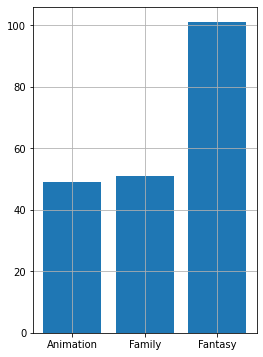

In [7]:
genres = ['Animation', 'Family', 'Fantasy']
data = {i:len(df[df['Genre'].str.contains(i)]) for i in genres}

fig, ax = plt.subplots(figsize = (4, 6))
ax.bar(data.keys(), data.values())
ax.grid()